In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import pubmed_parser as pp

# visualization
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

## Read and clean datasets

In [2]:
# read all datasets with inclusion decisions
url = "https://dmice.ohsu.edu/cohenaa/epc-ir-data/epc-ir.clean.tsv"
df_labels = pd.read_table(url, names=["disease", "endnoteID", "pubmedID", "abstractLabel", "articleLabel"])

In [3]:
# subset 15 datasets with inclusion decisions
ACEInhibitors = df_labels[df_labels.disease == "ACEInhibitors"]
ADHD = df_labels[df_labels.disease == "ADHD"]
Antihistamines = df_labels[df_labels.disease == "Antihistamines"]
AtypicalAntipsychotics = df_labels[df_labels.disease == "AtypicalAntipsychotics"]
BetaBlockers = df_labels[df_labels.disease == "BetaBlockers"]
CalciumChannelBlockers = df_labels[df_labels.disease == "CalciumChannelBlockers"]
Estrogens = df_labels[df_labels.disease == "Estrogens"]
NSAIDS = df_labels[df_labels.disease == "NSAIDS"]
Opiods = df_labels[df_labels.disease == "Opiods"]
OralHypoglycemics = df_labels[df_labels.disease == "OralHypoglycemics"]
ProtonPumpInhibitors = df_labels[df_labels.disease == "ProtonPumpInhibitors"]
SkeletalMuscleRelaxants = df_labels[df_labels.disease == "SkeletalMuscleRelaxants"]
Statins = df_labels[df_labels.disease == "Statins"]
Triptans = df_labels[df_labels.disease == "Triptans"]
UrinaryIncontinence = df_labels[df_labels.disease == "UrinaryIncontinence"]

In [4]:
def data_retrieval(df_labels):
    '''
    Retrieve and incorporate articles information by parsing XML file from E-Utilities
    Return cleaned datasets
    '''
    
    # create dataset with empty articles information
    df = pd.DataFrame({"pubmedID": df_labels.pubmedID, 
                       "title": "", "authors": "", "abstract": "", "year": "", 
                       # add inclusion labels
                       "label_included": np.where(df_labels.articleLabel == "I", 1, 0), 
                       "label_abstract_screening": np.where(df_labels.abstractLabel == "I", 1, 0)}).reset_index(drop=True)
    
    # retrieve and incorporate articles information
    for i in range(0, len(df)):
        id = df.loc[i, "pubmedID"]
        query = pp.parse_xml_web(pmid=id, save_xml=False)
        df.loc[i, "title"] = query["title"]
        df.loc[i, "authors"] = query["authors"]
        df.loc[i, "abstract"] = query["abstract"]
        df.loc[i, "year"] = query["year"]
    
    # add record id
    df.insert(0, "record_id", df.index + 1)
    
    # mark missing values
    df["title"] = df["title"].astype("str")
    df["abstract"] = df["abstract"].astype("str")
    df["year"] = df["year"].astype("str")
    
    df.loc[df.title == "", "title"] = None
    df.loc[df.abstract == "", "abstract"] = None
    df.loc[df.year == "", "year"] = None
    df["year"] = pd.to_numeric(df["year"])
    
    return df

In [5]:
# retrieve 15 cleaned datasets
# NOTE: Time-consuming(about 3 HOURS)
df_ACEInhibitors = data_retrieval(ACEInhibitors)
df_ADHD = data_retrieval(ADHD)
df_Antihistamines = data_retrieval(Antihistamines)
df_AtypicalAntipsychotics = data_retrieval(AtypicalAntipsychotics)
df_BetaBlockers = data_retrieval(BetaBlockers)
df_CalciumChannelBlockers = data_retrieval(CalciumChannelBlockers)
df_Estrogens = data_retrieval(Estrogens)
df_NSAIDS = data_retrieval(NSAIDS)
df_Opiods = data_retrieval(Opiods)
df_OralHypoglycemics = data_retrieval(OralHypoglycemics)
df_ProtonPumpInhibitors = data_retrieval(ProtonPumpInhibitors)
df_SkeletalMuscleRelaxants = data_retrieval(SkeletalMuscleRelaxants)
df_Statins = data_retrieval(Statins)
df_Triptans = data_retrieval(Triptans)
df_UrinaryIncontinence = data_retrieval(UrinaryIncontinence)

## Export datasets

In [6]:
Path("output/online").mkdir(parents=True, exist_ok=True)
df_ACEInhibitors.to_csv("output/online/ACEInhibitors.csv", index=False)
df_ADHD.to_csv("output/online/ADHD.csv", index=False)
df_Antihistamines.to_csv("output/online/Antihistamines.csv", index=False)
df_AtypicalAntipsychotics.to_csv("output/online/AtypicalAntipsychotics.csv", index=False)
df_BetaBlockers.to_csv("output/online/BetaBlockers.csv", index=False)
df_CalciumChannelBlockers.to_csv("output/online/CalciumChannelBlockers.csv", index=False)
df_Estrogens.to_csv("output/online/Estrogens.csv", index=False)
df_NSAIDS.to_csv("output/online/NSAIDS.csv", index=False)
df_Opiods.to_csv("output/online/Opiods.csv", index=False)
df_OralHypoglycemics.to_csv("output/online/OralHypoglycemics.csv", index=False)
df_ProtonPumpInhibitors.to_csv("output/online/ProtonPumpInhibitors.csv", index=False)
df_SkeletalMuscleRelaxants.to_csv("output/online/SkeletalMuscleRelaxants.csv", index=False)
df_Statins.to_csv("output/online/Statins.csv", index=False)
df_Triptans.to_csv("output/online/Triptans.csv", index=False)
df_UrinaryIncontinence.to_csv("output/online/UrinaryIncontinence.csv", index=False)

## Datasets statistics

In [7]:
# assign datasets names
df_ACEInhibitors.name = "ACEInhibitors"
df_ADHD.name = "ADHD"
df_Antihistamines.name = "Antihistamines"
df_AtypicalAntipsychotics.name = "AtypicalAntipsychotics"
df_BetaBlockers.name = "BetaBlockers"
df_CalciumChannelBlockers.name = "CalciumChannelBlockers"
df_Estrogens.name = "Estrogens"
df_NSAIDS.name = "NSAIDS"
df_Opiods.name = "Opiods"
df_OralHypoglycemics.name = "OralHypoglycemics"
df_ProtonPumpInhibitors.name = "ProtonPumpInhibitors"
df_SkeletalMuscleRelaxants.name = "SkeletalMuscleRelaxants"
df_Statins.name = "Statins"
df_Triptans.name = "Triptans"
df_UrinaryIncontinence.name = "UrinaryIncontinence"

In [8]:
def summary_stats(df):
    """Overview of number of papers and inclusion rate"""
    
    # basic statistics
    n = len(df)
    n_inc = df["label_included"].sum()
    n_inc_abs = df["label_abstract_screening"].sum()
    n_exc = n - n_inc
    n_exc_abs = n - n_inc_abs
    n_exc_full = n_inc_abs - n_inc  
    print("Number of papers with missing title:        ", df["title"].isna().sum(), "\n")
    print("Number of papers with missing abstract:     ", df["abstract"].isna().sum(), "\n")
    print("Total number of papers:                     ", n, "\n")
    print("Total number of EXCLUSIONS:                 ", n_exc, "\n")
    print("Total EXCLUSIONS after abstract screening:  ", n_exc_abs, "\n")
    print("Total INCLUSIONS after abstract screening:  ", n_inc_abs, "\n")
    print("Total EXCLUSIONS after full text screening: ", n_exc_full, "\n")
    print("Total INCLUSIONS after full text screening: ", n_inc, " (", round(100*n_inc/n, 2), "% )\n")

    # plot number of papers over years
    df.groupby("year").size().reset_index(name="count").set_index("year").plot(figsize=(15,5))
    plt.title("Number of papers in "+ df.name + " dataset over years")
    plt.show()
    
    # plot number of papers with missing abstract over years
    df["abstract"].isna().groupby(df["year"]).sum().astype(int).\
    reset_index(name="count").set_index("year").plot(figsize=(15,5))
    plt.title("Number of papers with missing abstract over years")
    plt.show()

In [9]:
# word cloud for titles and abstracts
# create stopword list
stopwords = set(STOPWORDS)
stopwords.update(["effect", "effects", "result", "results", "conclusion", "conclusions", "patient", "patients"])

def word_cloud(df):
    """Word cloud for titles and abstracts"""
    
    # create word cloud text
    title_text = " ".join(str(word) for word in df.title)
    abstract_text = " ".join(str(word) for word in df.abstract)
    print("\n", "There are {} words in the combination of all titles in".format(len(title_text)), df.name, "dataset.")
    print("\n", "There are {} words in the combination of all abstracts in".format(len(abstract_text)), df.name, "dataset.", "\n")

    # generate word cloud images
    title_wordcloud = WordCloud(stopwords=stopwords, max_words=100, background_color="white").generate(title_text)
    abstract_wordcloud = WordCloud(stopwords=stopwords, max_words=100, background_color="white").generate(abstract_text)
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=[15, 15])
    ax1.imshow(title_wordcloud, interpolation="bilinear")
    ax1.set_title("Titles of " + df.name + " dataset")
    ax1.axis("off")
    ax2.imshow(abstract_wordcloud, interpolation="bilinear")
    ax2.set_title("Abstracts of " + df.name + " dataset")
    ax2.axis("off")
    plt.show()

### 1 - ACEInhibitors dataset

Number of papers with missing title:         26 

Number of papers with missing abstract:      330 

Total number of papers:                      2544 

Total number of EXCLUSIONS:                  2503 

Total EXCLUSIONS after abstract screening:   2361 

Total INCLUSIONS after abstract screening:   183 

Total EXCLUSIONS after full text screening:  142 

Total INCLUSIONS after full text screening:  41  ( 1.61 % )



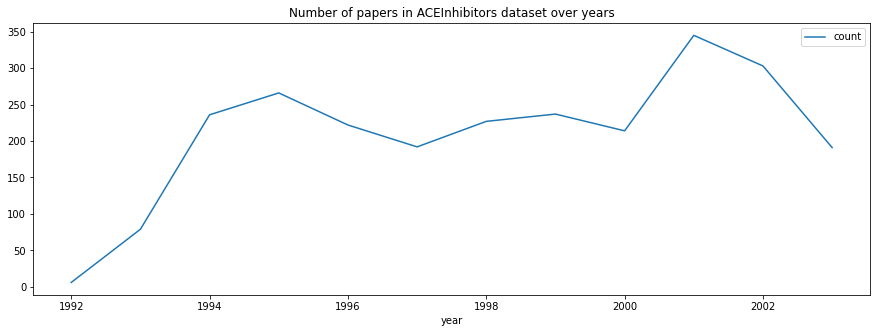

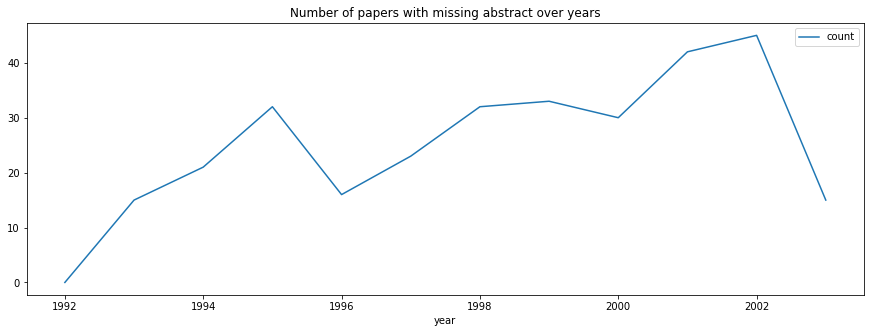


 There are 299502 words in the combination of all titles in ACEInhibitors dataset.

 There are 3592565 words in the combination of all abstracts in ACEInhibitors dataset. 



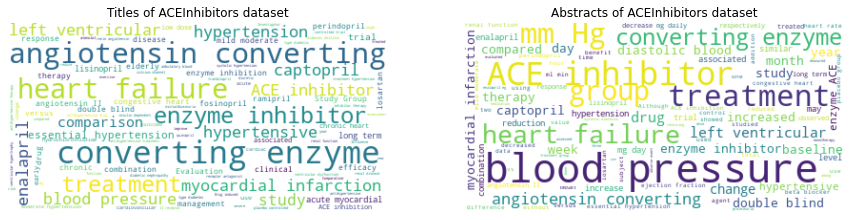

In [10]:
summary_stats(df_ACEInhibitors)
word_cloud(df_ACEInhibitors)

### 2 - ADHD dataset

Number of papers with missing title:         24 

Number of papers with missing abstract:      70 

Total number of papers:                      851 

Total number of EXCLUSIONS:                  831 

Total EXCLUSIONS after abstract screening:   767 

Total INCLUSIONS after abstract screening:   84 

Total EXCLUSIONS after full text screening:  64 

Total INCLUSIONS after full text screening:  20  ( 2.35 % )



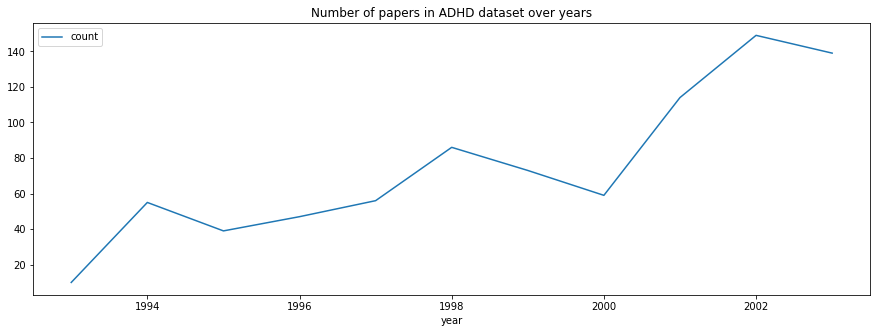

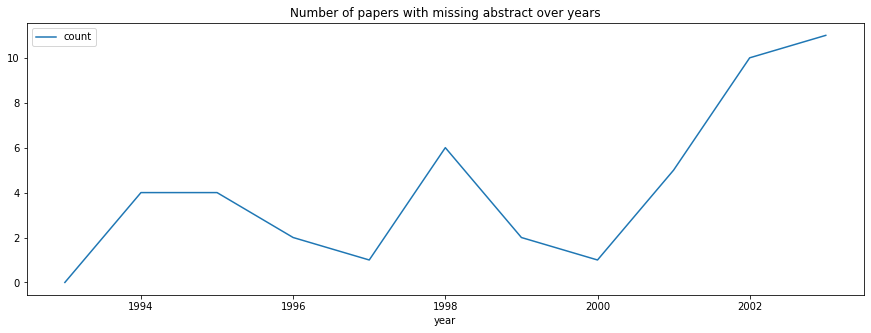


 There are 88406 words in the combination of all titles in ADHD dataset.

 There are 1196928 words in the combination of all abstracts in ADHD dataset. 



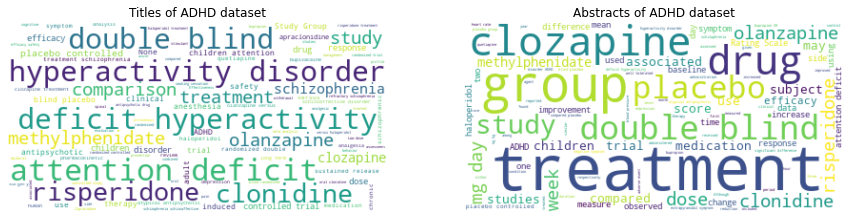

In [11]:
summary_stats(df_ADHD)
word_cloud(df_ADHD)

### 3 - Antihistamines dataset

Number of papers with missing title:         10 

Number of papers with missing abstract:      33 

Total number of papers:                      310 

Total number of EXCLUSIONS:                  294 

Total EXCLUSIONS after abstract screening:   218 

Total INCLUSIONS after abstract screening:   92 

Total EXCLUSIONS after full text screening:  76 

Total INCLUSIONS after full text screening:  16  ( 5.16 % )



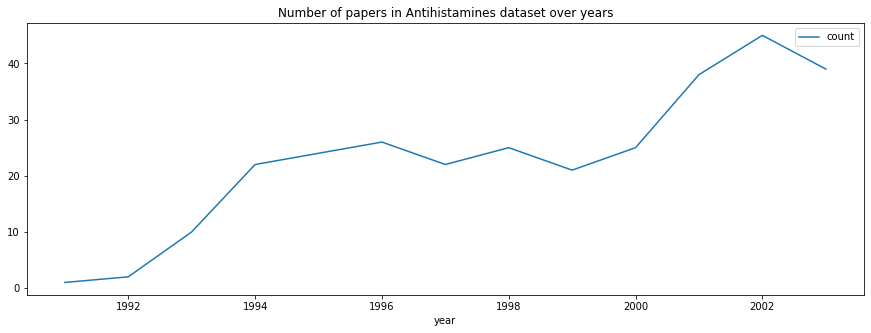

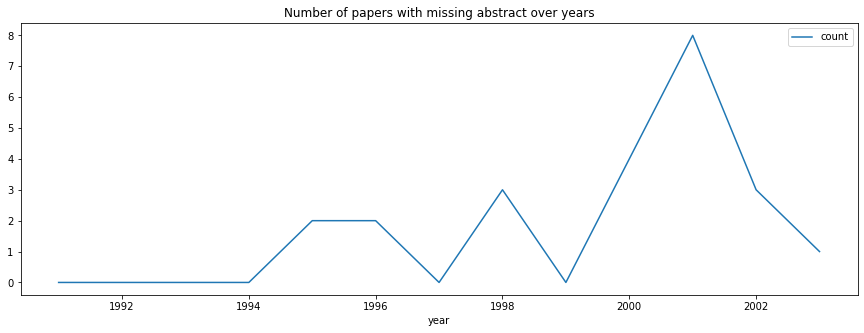


 There are 32167 words in the combination of all titles in Antihistamines dataset.

 There are 419115 words in the combination of all abstracts in Antihistamines dataset. 



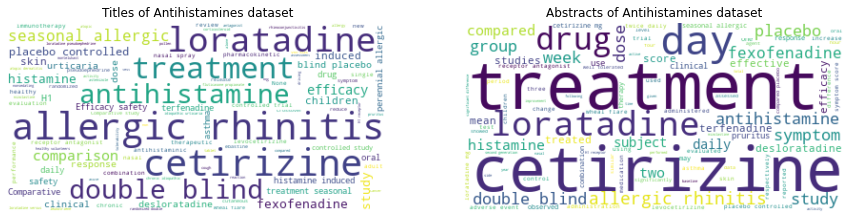

In [12]:
summary_stats(df_Antihistamines)
word_cloud(df_Antihistamines)

### 4 - AtypicalAntipsychotics

Number of papers with missing title:         34 

Number of papers with missing abstract:      121 

Total number of papers:                      1120 

Total number of EXCLUSIONS:                  974 

Total EXCLUSIONS after abstract screening:   757 

Total INCLUSIONS after abstract screening:   363 

Total EXCLUSIONS after full text screening:  217 

Total INCLUSIONS after full text screening:  146  ( 13.04 % )



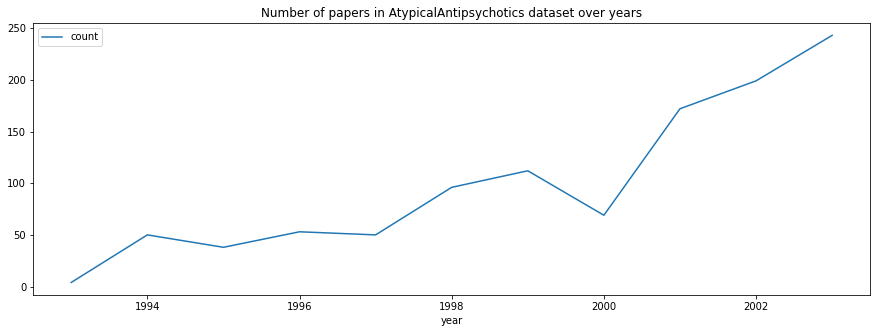

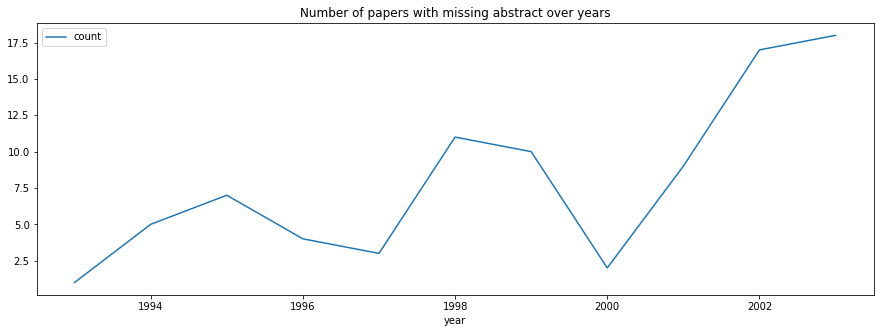


 There are 108411 words in the combination of all titles in AtypicalAntipsychotics dataset.

 There are 1466476 words in the combination of all abstracts in AtypicalAntipsychotics dataset. 



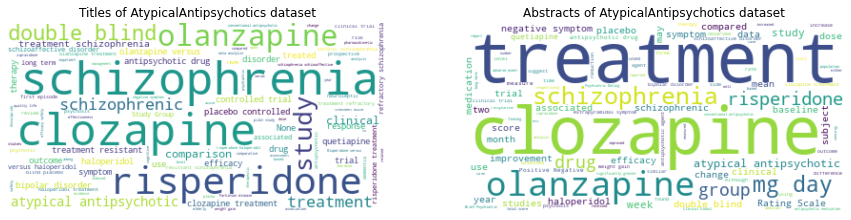

In [13]:
summary_stats(df_AtypicalAntipsychotics)
word_cloud(df_AtypicalAntipsychotics)

### 5 - BetaBlockers

Number of papers with missing title:         60 

Number of papers with missing abstract:      253 

Total number of papers:                      2072 

Total number of EXCLUSIONS:                  2030 

Total EXCLUSIONS after abstract screening:   1770 

Total INCLUSIONS after abstract screening:   302 

Total EXCLUSIONS after full text screening:  260 

Total INCLUSIONS after full text screening:  42  ( 2.03 % )



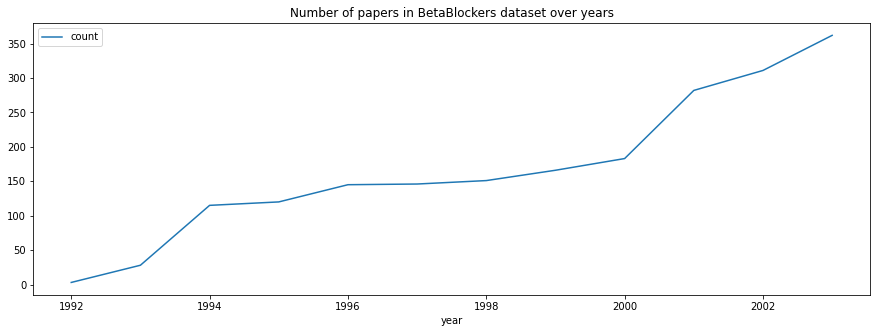

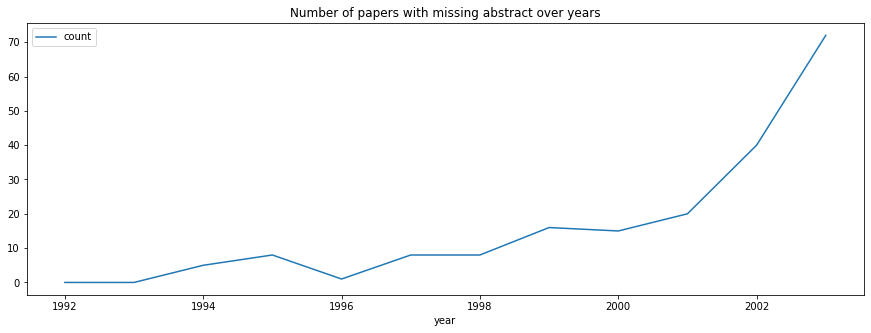


 There are 233646 words in the combination of all titles in BetaBlockers dataset.

 There are 2943390 words in the combination of all abstracts in BetaBlockers dataset. 



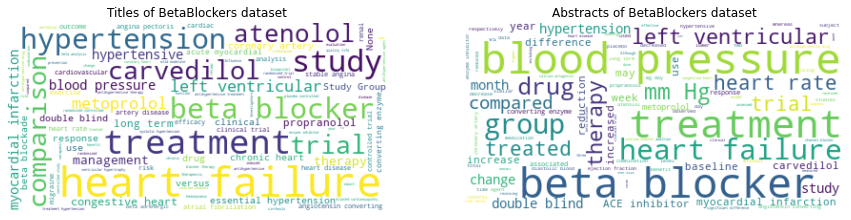

In [14]:
summary_stats(df_BetaBlockers)
word_cloud(df_BetaBlockers)

### 6 - CalciumChannelBlockers

Number of papers with missing title:         43 

Number of papers with missing abstract:      149 

Total number of papers:                      1218 

Total number of EXCLUSIONS:                  1118 

Total EXCLUSIONS after abstract screening:   939 

Total INCLUSIONS after abstract screening:   279 

Total EXCLUSIONS after full text screening:  179 

Total INCLUSIONS after full text screening:  100  ( 8.21 % )



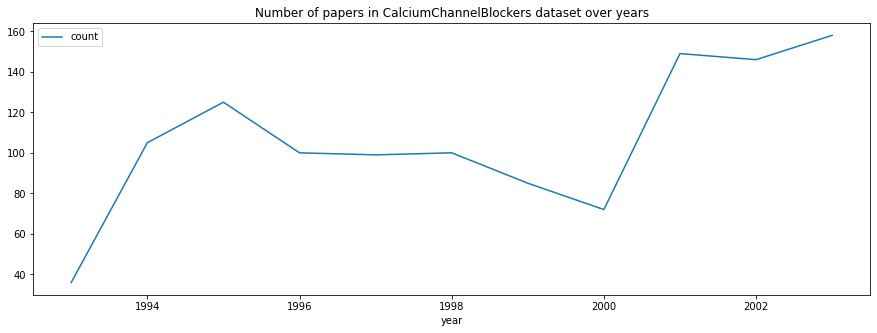

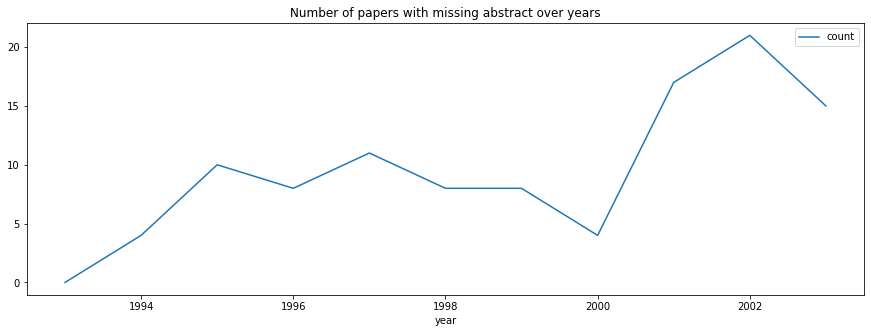


 There are 141227 words in the combination of all titles in CalciumChannelBlockers dataset.

 There are 1737048 words in the combination of all abstracts in CalciumChannelBlockers dataset. 



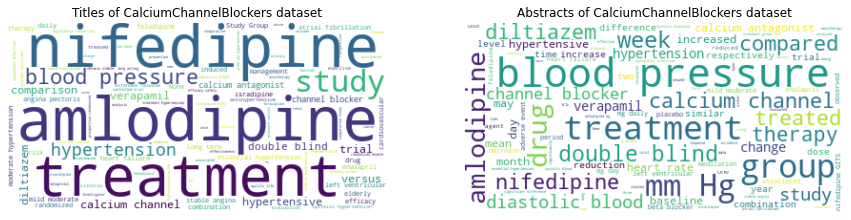

In [15]:
summary_stats(df_CalciumChannelBlockers)
word_cloud(df_CalciumChannelBlockers)

### 7 - Estrogens

Number of papers with missing title:         14 

Number of papers with missing abstract:      31 

Total number of papers:                      368 

Total number of EXCLUSIONS:                  288 

Total EXCLUSIONS after abstract screening:   288 

Total INCLUSIONS after abstract screening:   80 

Total EXCLUSIONS after full text screening:  0 

Total INCLUSIONS after full text screening:  80  ( 21.74 % )



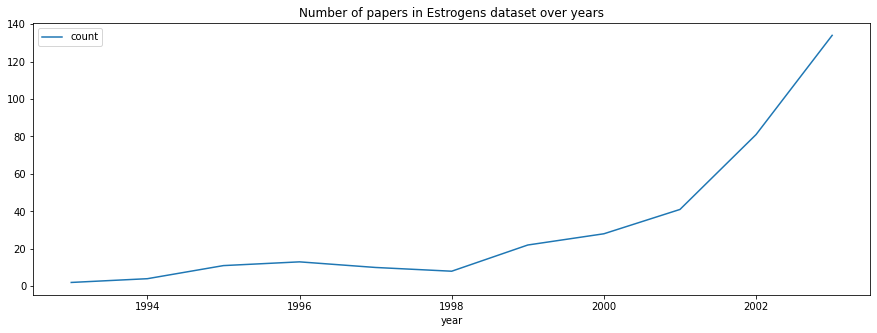

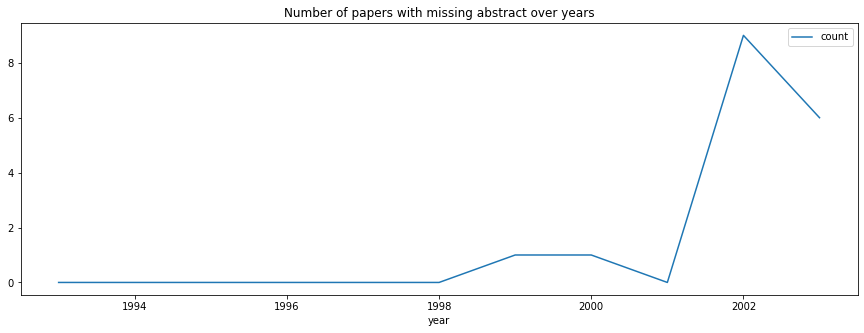


 There are 43816 words in the combination of all titles in Estrogens dataset.

 There are 603506 words in the combination of all abstracts in Estrogens dataset. 



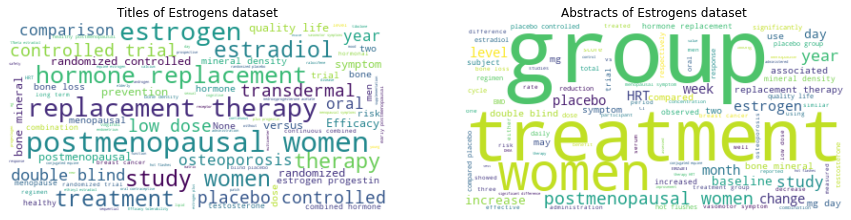

In [16]:
summary_stats(df_Estrogens)
word_cloud(df_Estrogens)

### 8 - NSAIDS

Number of papers with missing title:         12 

Number of papers with missing abstract:      45 

Total number of papers:                      393 

Total number of EXCLUSIONS:                  352 

Total EXCLUSIONS after abstract screening:   305 

Total INCLUSIONS after abstract screening:   88 

Total EXCLUSIONS after full text screening:  47 

Total INCLUSIONS after full text screening:  41  ( 10.43 % )



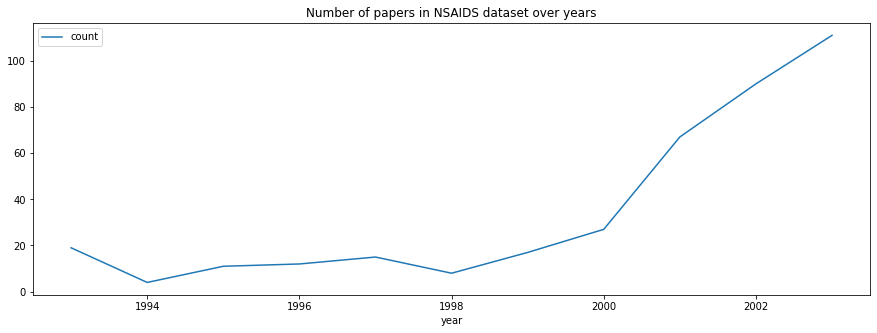

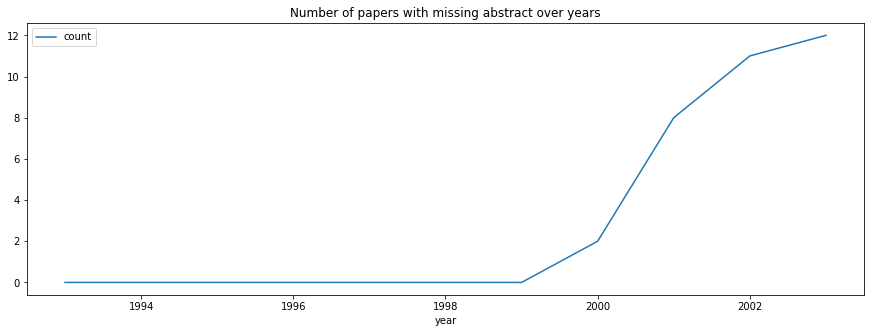


 There are 42784 words in the combination of all titles in NSAIDS dataset.

 There are 544850 words in the combination of all abstracts in NSAIDS dataset. 



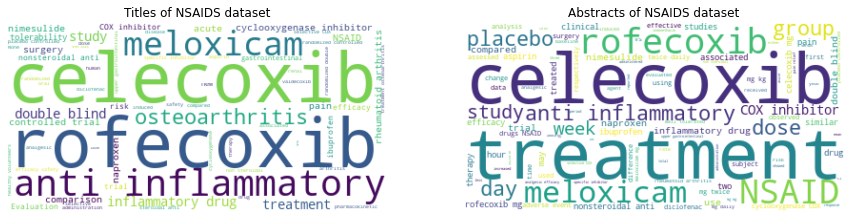

In [17]:
summary_stats(df_NSAIDS)
word_cloud(df_NSAIDS)

### 9 - Opiods

Number of papers with missing title:         60 

Number of papers with missing abstract:      198 

Total number of papers:                      1915 

Total number of EXCLUSIONS:                  1900 

Total EXCLUSIONS after abstract screening:   1867 

Total INCLUSIONS after abstract screening:   48 

Total EXCLUSIONS after full text screening:  33 

Total INCLUSIONS after full text screening:  15  ( 0.78 % )



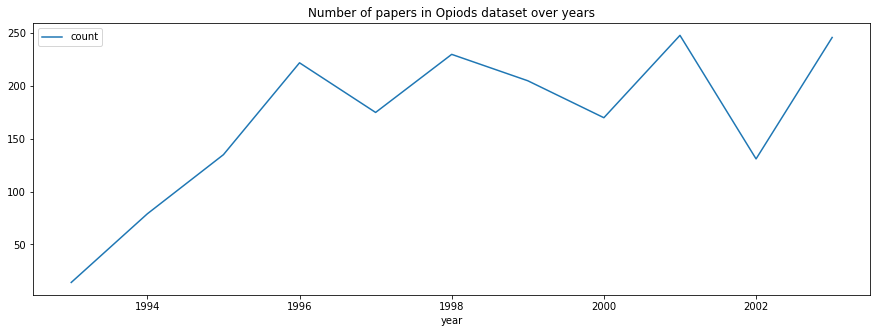

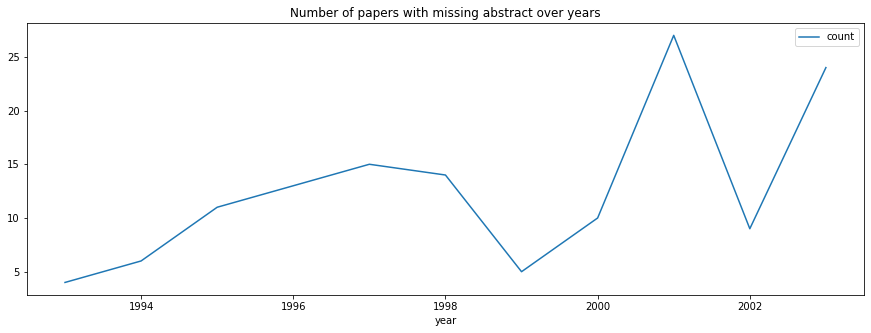


 There are 180561 words in the combination of all titles in Opiods dataset.

 There are 2515460 words in the combination of all abstracts in Opiods dataset. 



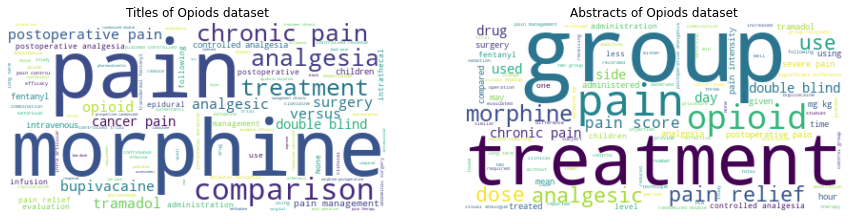

In [18]:
summary_stats(df_Opiods)
word_cloud(df_Opiods)

### 10 - OralHypoglycemics

Number of papers with missing title:         13 

Number of papers with missing abstract:      41 

Total number of papers:                      503 

Total number of EXCLUSIONS:                  367 

Total EXCLUSIONS after abstract screening:   364 

Total INCLUSIONS after abstract screening:   139 

Total EXCLUSIONS after full text screening:  3 

Total INCLUSIONS after full text screening:  136  ( 27.04 % )



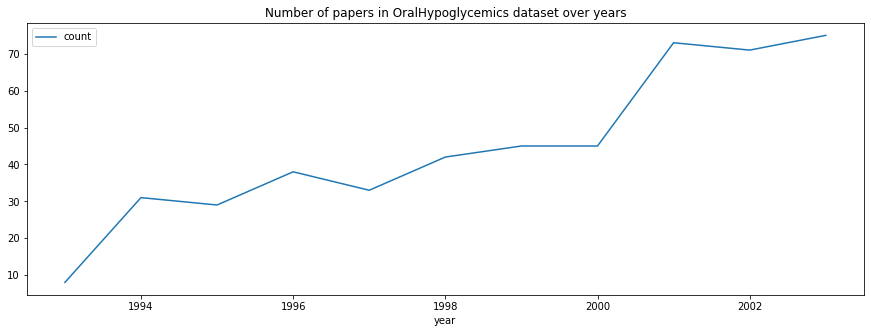

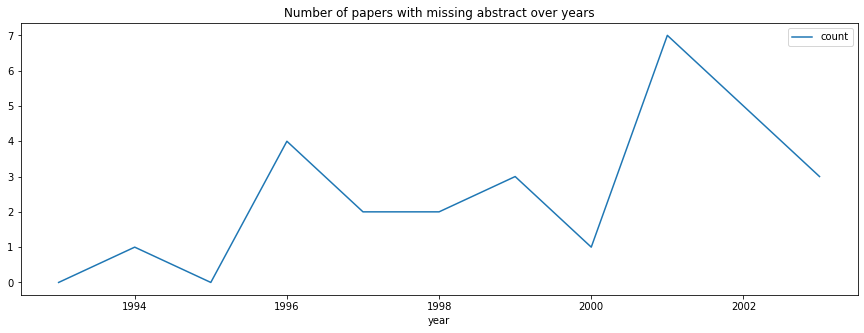


 There are 54179 words in the combination of all titles in OralHypoglycemics dataset.

 There are 774272 words in the combination of all abstracts in OralHypoglycemics dataset. 



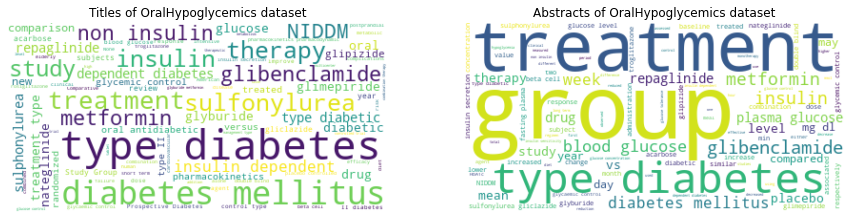

In [19]:
summary_stats(df_OralHypoglycemics)
word_cloud(df_OralHypoglycemics)

### 11 - ProtonPumpInhibitors

Number of papers with missing title:         44 

Number of papers with missing abstract:      162 

Total number of papers:                      1333 

Total number of EXCLUSIONS:                  1282 

Total EXCLUSIONS after abstract screening:   1095 

Total INCLUSIONS after abstract screening:   238 

Total EXCLUSIONS after full text screening:  187 

Total INCLUSIONS after full text screening:  51  ( 3.83 % )



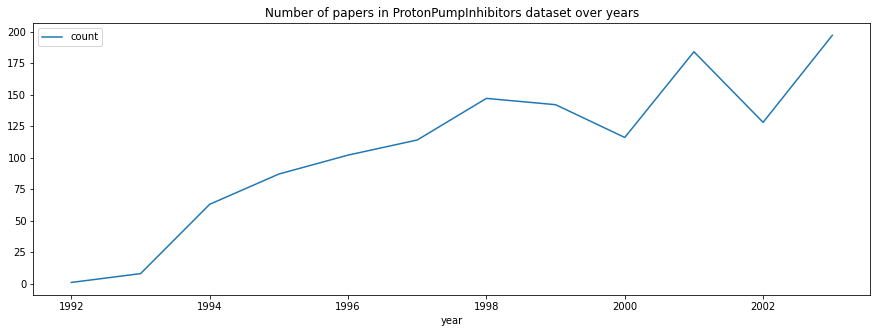

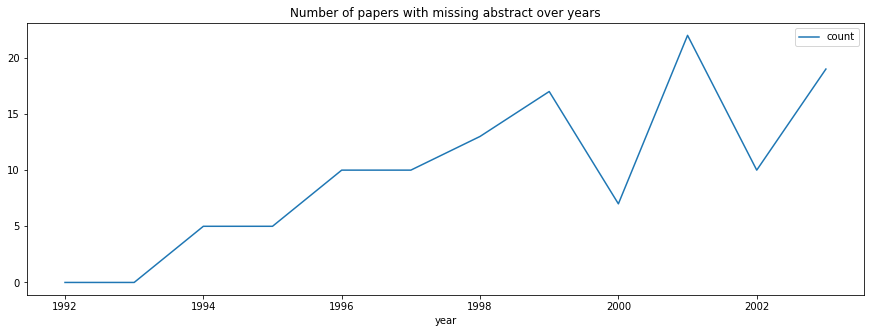


 There are 142412 words in the combination of all titles in ProtonPumpInhibitors dataset.

 There are 1845544 words in the combination of all abstracts in ProtonPumpInhibitors dataset. 



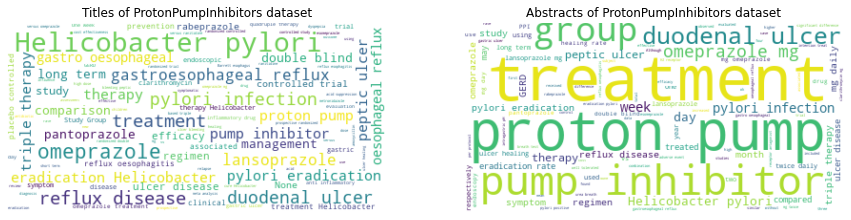

In [20]:
summary_stats(df_ProtonPumpInhibitors)
word_cloud(df_ProtonPumpInhibitors)

### 12 - SkeletalMuscleRelaxants

Number of papers with missing title:         40 

Number of papers with missing abstract:      325 

Total number of papers:                      1643 

Total number of EXCLUSIONS:                  1634 

Total EXCLUSIONS after abstract screening:   1609 

Total INCLUSIONS after abstract screening:   34 

Total EXCLUSIONS after full text screening:  25 

Total INCLUSIONS after full text screening:  9  ( 0.55 % )



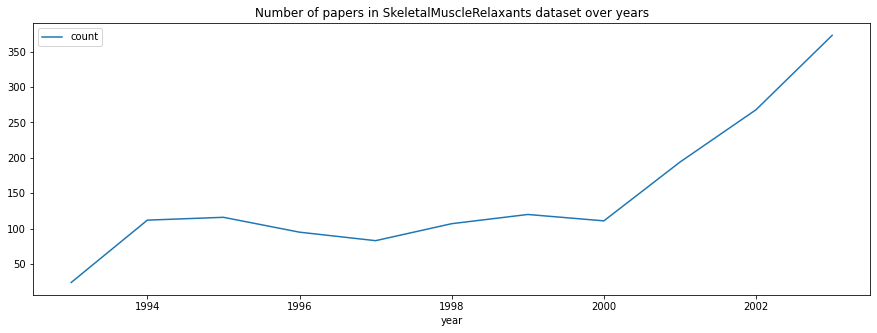

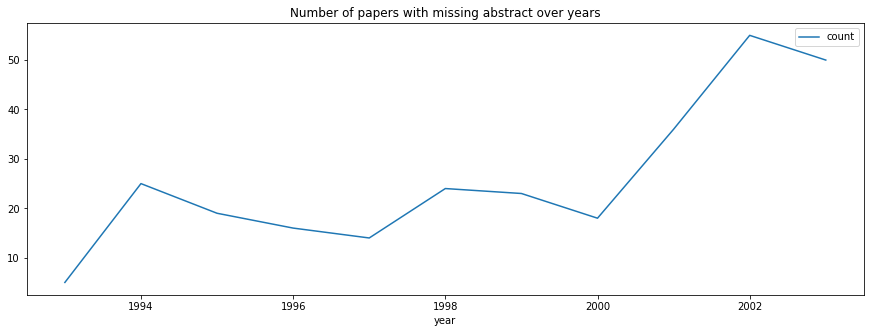


 There are 123358 words in the combination of all titles in SkeletalMuscleRelaxants dataset.

 There are 1638279 words in the combination of all abstracts in SkeletalMuscleRelaxants dataset. 



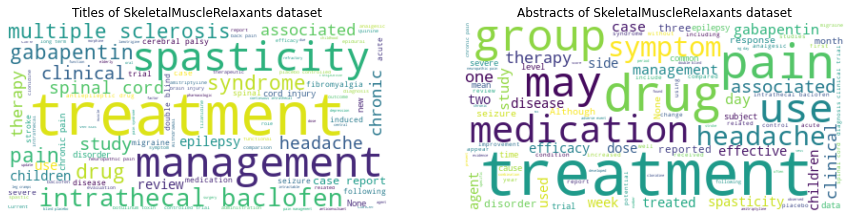

In [21]:
summary_stats(df_SkeletalMuscleRelaxants)
word_cloud(df_SkeletalMuscleRelaxants)

### 13 - Statins

Number of papers with missing title:         102 

Number of papers with missing abstract:      806 

Total number of papers:                      3465 

Total number of EXCLUSIONS:                  3380 

Total EXCLUSIONS after abstract screening:   3292 

Total INCLUSIONS after abstract screening:   173 

Total EXCLUSIONS after full text screening:  88 

Total INCLUSIONS after full text screening:  85  ( 2.45 % )



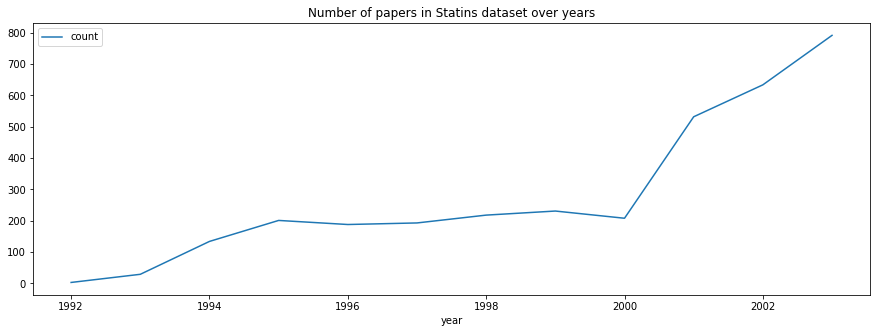

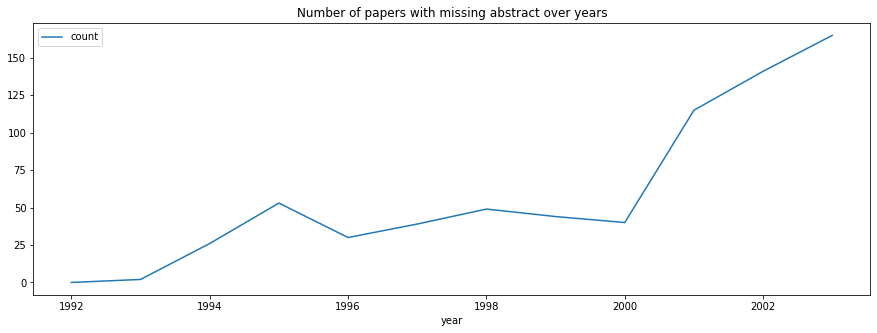


 There are 346744 words in the combination of all titles in Statins dataset.

 There are 4139104 words in the combination of all abstracts in Statins dataset. 



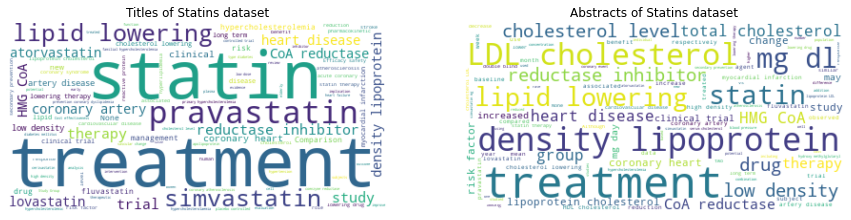

In [22]:
summary_stats(df_Statins)
word_cloud(df_Statins)

### 14 - Triptans

Number of papers with missing title:         24 

Number of papers with missing abstract:      98 

Total number of papers:                      671 

Total number of EXCLUSIONS:                  647 

Total EXCLUSIONS after abstract screening:   453 

Total INCLUSIONS after abstract screening:   218 

Total EXCLUSIONS after full text screening:  194 

Total INCLUSIONS after full text screening:  24  ( 3.58 % )



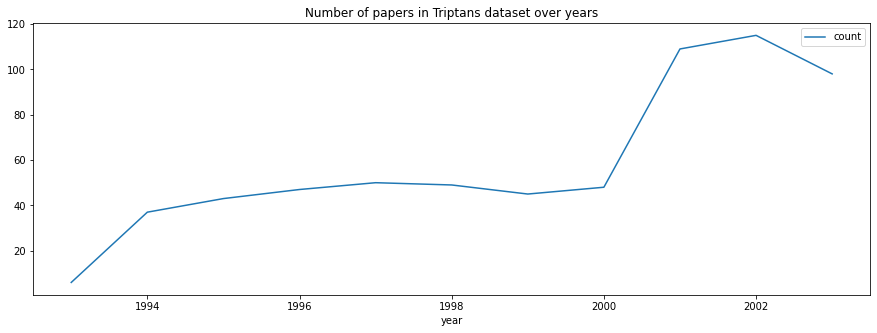

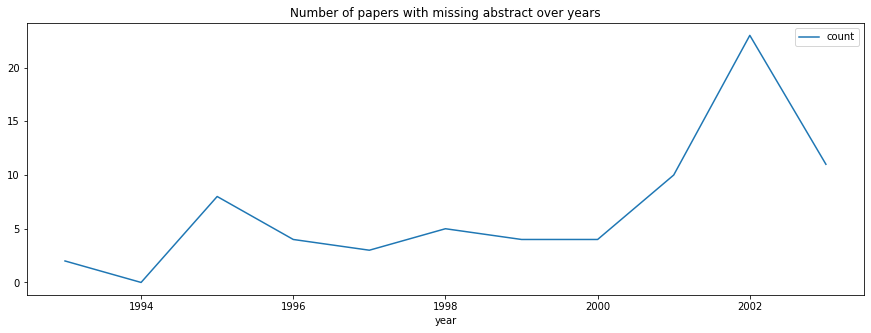


 There are 60107 words in the combination of all titles in Triptans dataset.

 There are 854308 words in the combination of all abstracts in Triptans dataset. 



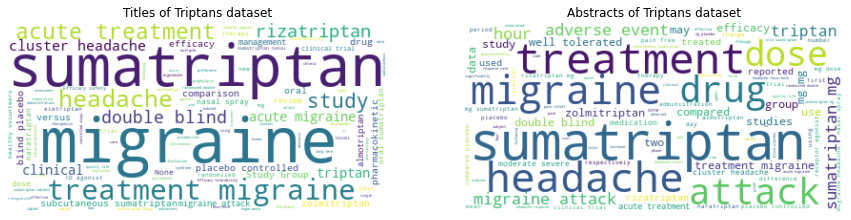

In [23]:
summary_stats(df_Triptans)
word_cloud(df_Triptans)

### 15 - UrinaryIncontinence

Number of papers with missing title:         18 

Number of papers with missing abstract:      56 

Total number of papers:                      327 

Total number of EXCLUSIONS:                  287 

Total EXCLUSIONS after abstract screening:   249 

Total INCLUSIONS after abstract screening:   78 

Total EXCLUSIONS after full text screening:  38 

Total INCLUSIONS after full text screening:  40  ( 12.23 % )



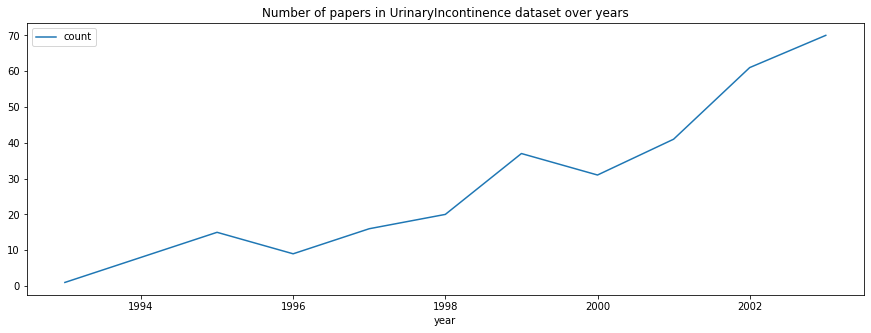

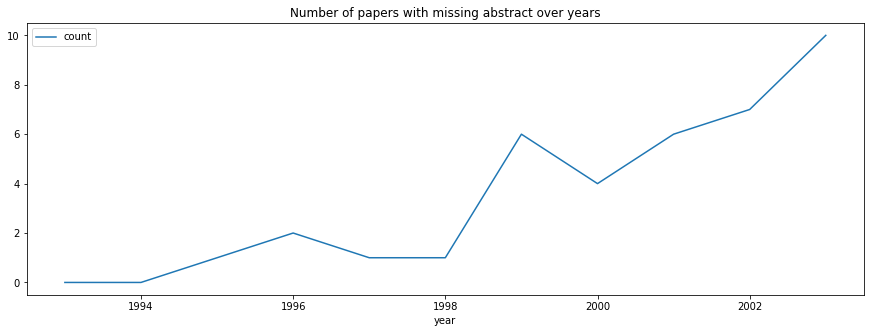


 There are 28460 words in the combination of all titles in UrinaryIncontinence dataset.

 There are 416951 words in the combination of all abstracts in UrinaryIncontinence dataset. 



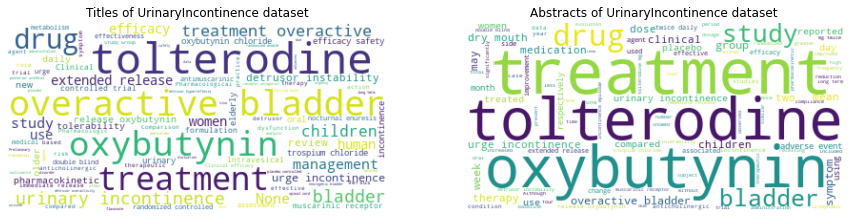

In [24]:
summary_stats(df_UrinaryIncontinence)
word_cloud(df_UrinaryIncontinence)